# Q2 
* Dataset: https://www.kaggle.com/competitions/nlp-getting-started/overview

## Dataset Description:
### What files do I need?
You'll need train.csv, test.csv and sample_submission.csv.


### Columns
* id - a unique identifier for each tweet
* text - the text of the tweet
* location - the location the tweet was sent from (may be blank)
* keyword - a particular keyword from the tweet (may be blank)
* target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

In [44]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Dell Latitude
[nltk_data]     E5470\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
train = pd.read_csv('train.csv')

In [46]:
train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [47]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


(7613, 5)
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
0    4342
1    3271
Name: target, dtype: int64


[nltk_data] Downloading package wordnet to C:\Users\Dell Latitude
[nltk_data]     E5470\AppData\Roaming\nltk_data...


,id,keyword,location,text,target
0,1,NaN,NaN,deed reason earthquake allah forgive,1
1,4,NaN,NaN,forest fire near ronge sask canada,1
2,5,NaN,NaN,resident asked shelter place notified officer ...,1
3,6,NaN,NaN,people receive wildfire evacuation order calif...,1
4,7,NaN,NaN,sent photo ruby alaska smoke wildfire pours sc...,1


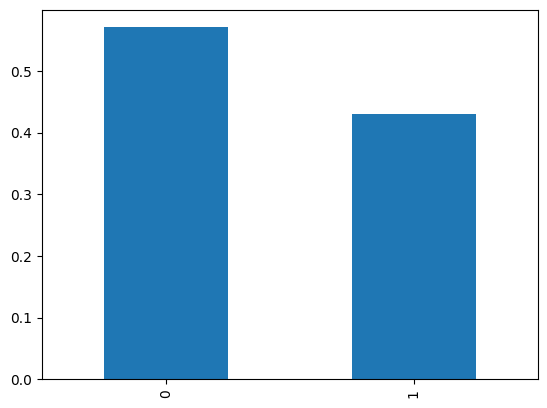

In [53]:
print(train.shape)
print(train.isna().sum())
print(train['target'].value_counts())
train['target'].value_counts(normalize=True).plot(kind='bar')


# Data Cleaning
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
stop_words = stopwords.words('english')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    text = re.sub(r'\b\w{1,3}\b', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text


train['text'] = train['text'].apply(lambda x: clean_text(x))

train['text'] = train['text'].apply(lambda x: ' '.join(
    [word for word in x.split() if word not in (stop_words)]))

train['text'] = train['text'].apply(lambda x: ' '.join(
    [lemmatizer.lemmatize(word) for word in x.split()]))




In [55]:
train_dataset = train.iloc[:, :-1]
train_labels = train.iloc[:, -1]


In [56]:
tfidf = TfidfVectorizer()
train_tfidf = tfidf.fit_transform(train_dataset['text'])
X_train, X_test, y_train, y_test = train_test_split(train_tfidf, train_labels, test_size=0.30, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

# Accuracy 

In [57]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7338003502626971
[[1022  296]
 [ 312  654]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      1318
           1       0.69      0.68      0.68       966

    accuracy                           0.73      2284
   macro avg       0.73      0.73      0.73      2284
weighted avg       0.73      0.73      0.73      2284



In [67]:
# grid search
param_grid = {'max_depth': np.arange(2, 10)}
tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
tree.fit(X_train, y_train)
print(tree.best_params_)
print(tree.best_score_)
print(tree.best_estimator_)
print(tree.best_index_)
print(tree.cv_results_)
print(tree.scorer_)
print(tree.n_splits_)
print(tree.refit_time_)
print(tree.predict_proba(X_test))


{'max_depth': 9}
0.6481499881087651
DecisionTreeClassifier(max_depth=9)
7
{'mean_fit_time': array([0.14155231, 0.18072319, 0.14778032, 0.16075101, 0.1790103 ,
       0.2429462 , 0.49725227, 0.38407664]), 'std_fit_time': array([0.03089249, 0.05828673, 0.00725641, 0.00368496, 0.00431282,
       0.087373  , 0.26458355, 0.10094906]), 'mean_score_time': array([0.00212288, 0.0042304 , 0.00181179, 0.00124621, 0.00101457,
       0.00219994, 0.00303102, 0.00162992]), 'std_score_time': array([1.48160608e-03, 5.49060800e-03, 1.46981512e-03, 4.44770125e-04,
       1.41505795e-05, 2.39560676e-03, 2.51835478e-03, 5.21718855e-04]), 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 2}, {'max_depth': 3}, {'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}, {'max_depth': 7}, {'max_depth': 8}, {'max_depth': 9}], 'split0_test_score': array([0.

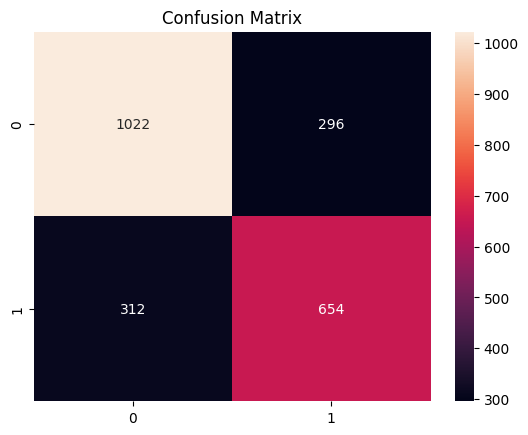

In [59]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()


[0.72232645 0.73170732 0.72983114 0.75609756 0.73358349 0.74108818
 0.74484053 0.73170732 0.70731707 0.76315789]
0.7361656956650539
0.015282859101111929


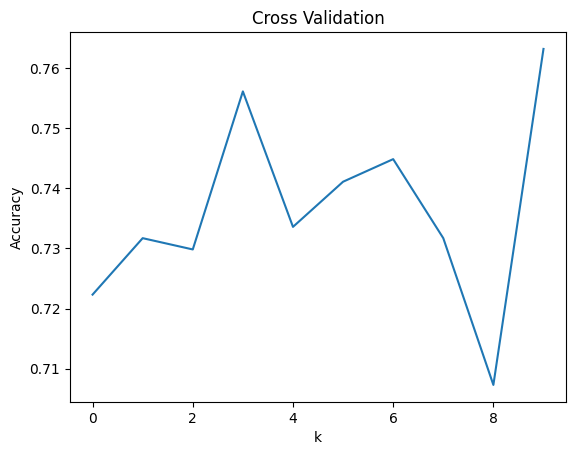

In [60]:
# cross validation
scores = cross_val_score(clf, X_train, y_train, cv=10)
print(scores)
print(scores.mean())
print(scores.std())

# plot
plt.plot(scores)
plt.title('Cross Validation')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()



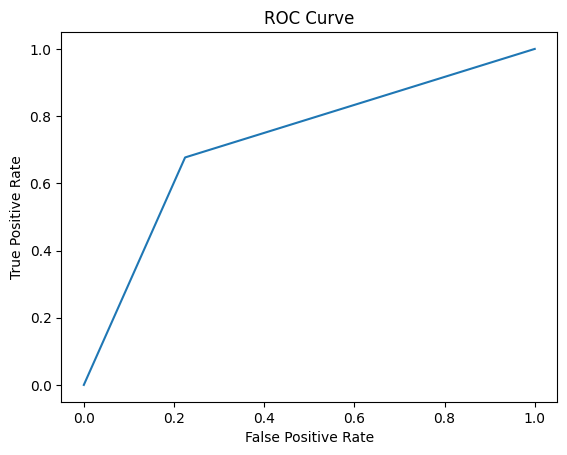

In [61]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

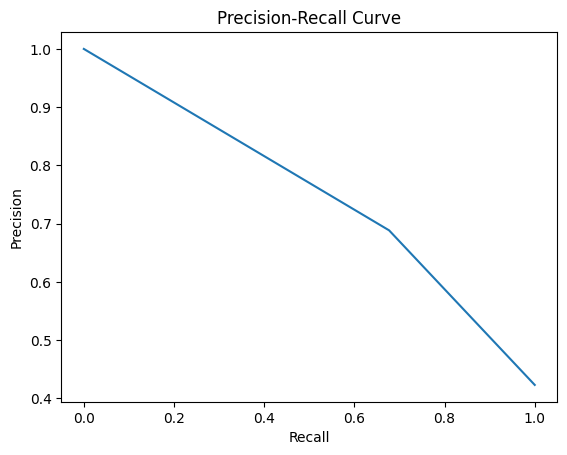

In [62]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()